In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import signal
from numpy.fft import fft, rfft, ifft
from audlib.sig.fbanks import MelFreq
from audlib.plot import magresp
plt.rc('text', usetex=True)

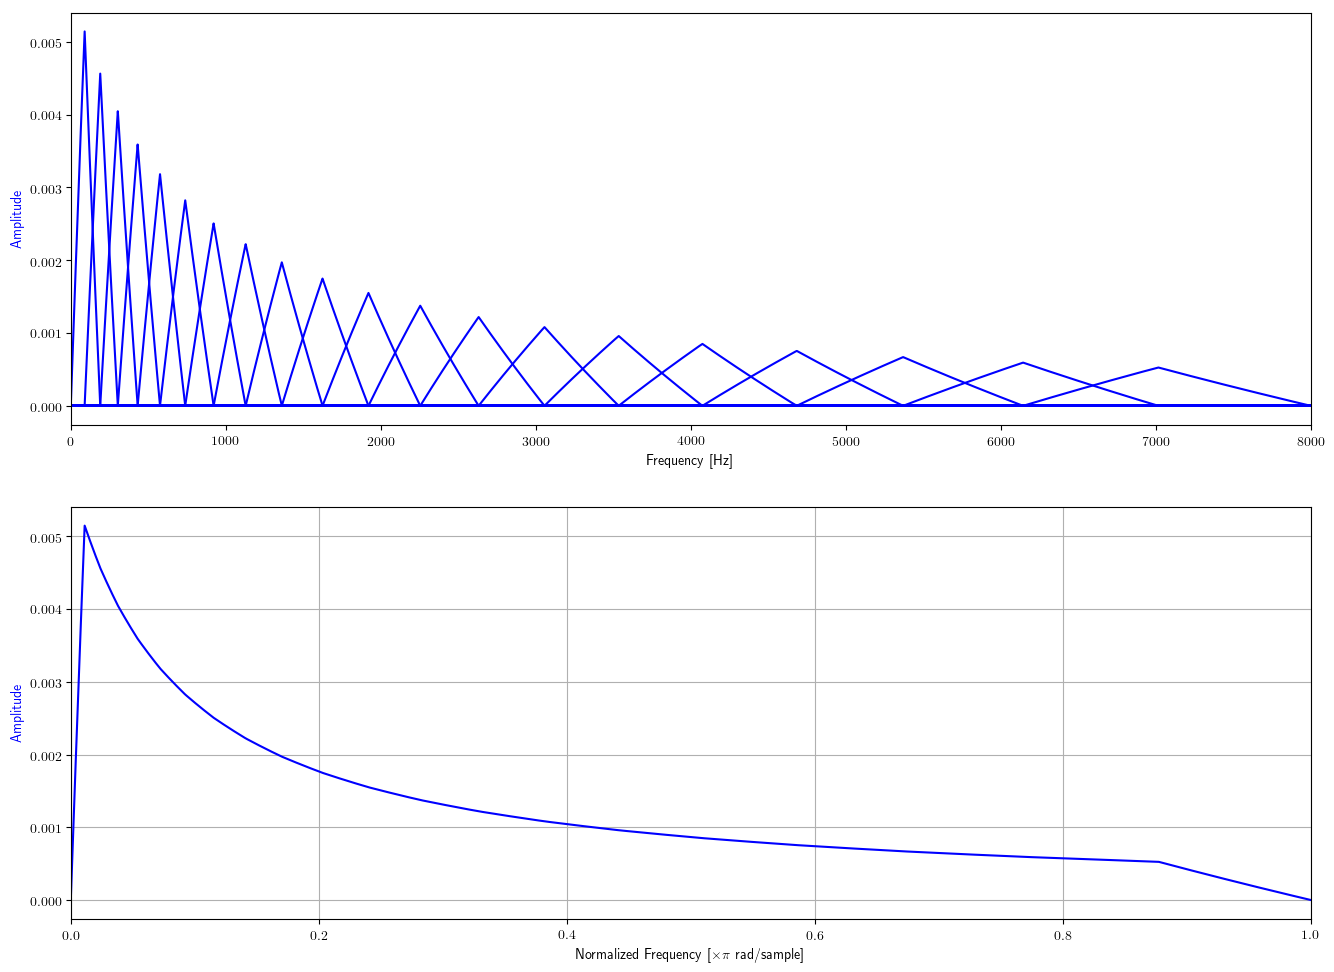

In [2]:
sr = 16000
nfft = 2**15
melbank = MelFreq(sr, nfft, 20, unity=True)
H = np.zeros((20, nfft//2+1), dtype=np.complex_)
for k in range(len(melbank)):
    ww, hh = melbank.freqz(k)
    H[k] = hh
### Plot first 10 filter responses
fig = plt.figure(figsize=(16, 12), dpi= 100)
ax1 = fig.add_subplot(211)
#plt.hold(True)
for kk in range(len(melbank)):
    magresp(ww*(sr/2), H[kk], ax1, units=('hz', 'mag'))
ax2 = fig.add_subplot(212)
magresp(ww, np.sum(H, axis=0), ax2, units=('rad', 'mag'))

/home/xyy/anaconda3/lib/python3.6/site-packages/scipy/fftpack/basic.py:153: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  x = x[index]


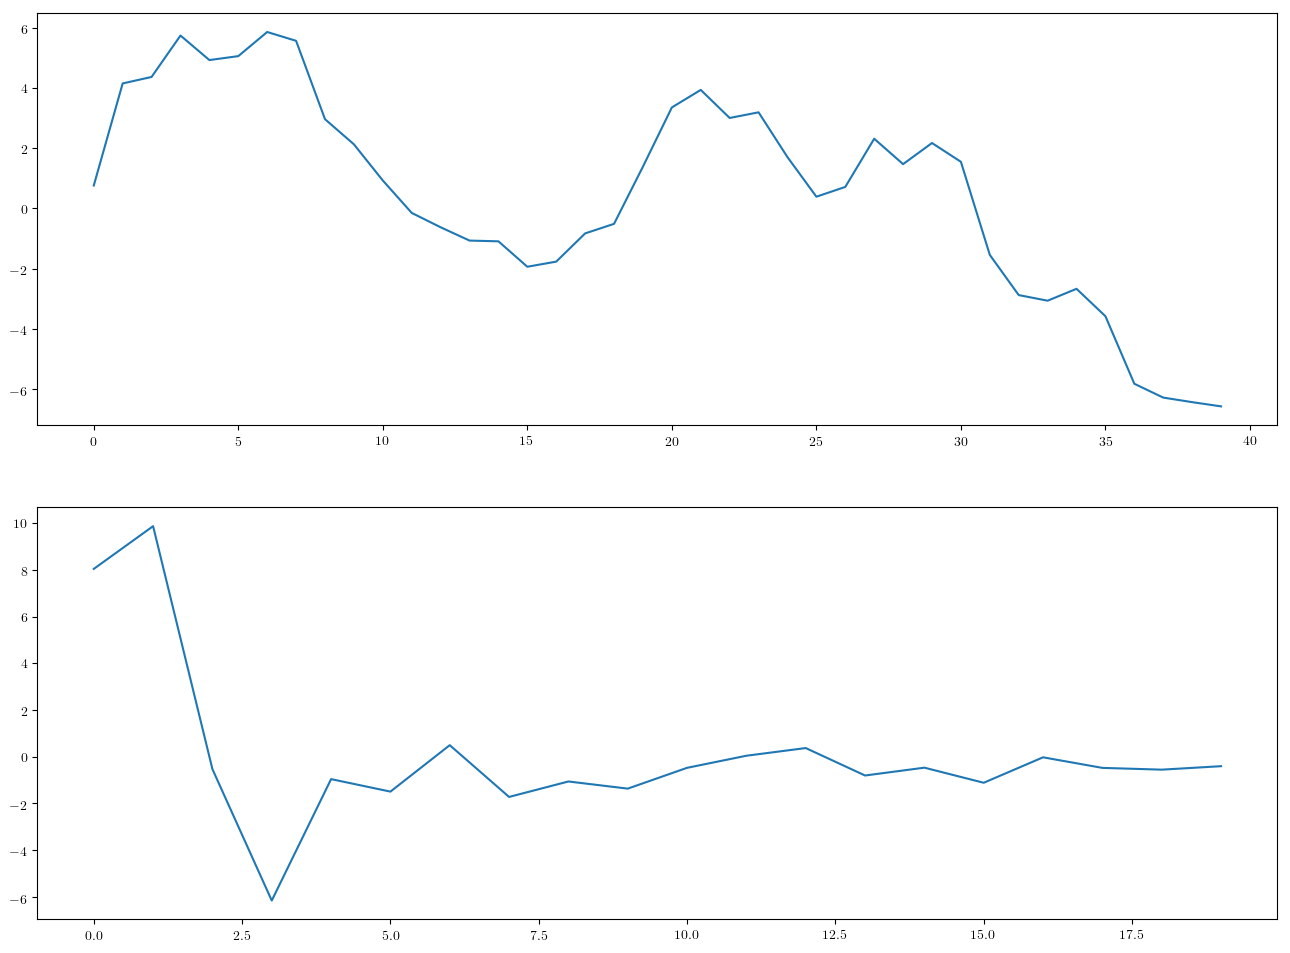

In [3]:
# Visualize MFCC

from audlib.io.audio import audioread
from audlib.plot import cepline

sig, sr = audioread('../samples/welcome16k.wav')
nstart = int(sr*0.534)  # Rich Stern uttering 'ee' of 'D'.
nfft = 512
dee = sig[nstart:nstart+nfft]
melbank = MelFreq(sr, nfft, 40, unity=True)
ndct = 20
melspec_dee = melbank.melspec(dee)
mfcc_dee = melbank.mfcc(dee, ndct)
#import ipdb; ipdb.set_trace()
#cepline(np.arange(ndct), mfcc_dee, ax1)
fig = plt.figure(figsize=(16, 12), dpi=100)
ax1 = fig.add_subplot(211)
ax1.plot(melspec_dee)
ax2 = fig.add_subplot(212)
ax2.plot(mfcc_dee)